In [1]:
%matplotlib inline

In [2]:
from matplotlib import *
from matplotlib.pyplot import *
from numpy import *
from random import sample

In [3]:
r = 3.0
sx = 15  # Physical grid size (external units, e.g. meters)
sy = 15
n_candidates = 30
n = sx * sy
cell_size_upper_bound = r / sqrt(n)
cell_size = 10**(ceil(log10(cell_size_upper_bound)) - 1)
cell_size

0.10000000000000001

In [4]:
s1 = int(sx / cell_size)  # Logical grid size (internal units for Bridson's algorithm)
s2 = int(sy / cell_size)
sr = r / cell_size  # Logical Poisson disc radius

grid = zeros((s1, s2))
grid = grid.astype(int)
grid.fill(-1)
start_point = random.randint(0, grid.shape[0]), random.randint(0, grid.shape[1])
start_point

(18, 39)

In [5]:
grid[start_point] = 0  # 0 is the first point index so can be hardcoded
active_points = set([start_point])  # Start the active points set
active_points

{(18, 39)}

In [38]:
def translate_point(point, translation):
    print(point, translation)
    return (point[0] + translation[0]), (point[1] + translation[1])

In [39]:
def generate_candidates(point, selector, n):
    candidates = set()
    while len(candidates) < n:
        # generate random points inside the selector's bounding box
        metacandidate = random.randint(0, selector.shape[0]),\
                        random.randint(0, selector.shape[1])
        # accept points covered by the selector
        if selector[metacandidate]:
            candidates.add(metacandidate)
    candidates = [translate_point(candidate, point) for candidate in candidates]
    return candidates

test_selector = array([[0, 1, 0],
                  [1, 1, 0],
                  [1, 0, 0]])

generate_candidates((6, 7), test_selector, 4)

(0, 1) (6, 7)
(2, 0) (6, 7)
(1, 0) (6, 7)
(1, 1) (6, 7)


[(6, 8), (8, 7), (7, 7), (7, 8)]

In [10]:
def distance_between_points(point_1, point_2):
    # Pythagorean theorem
    return sqrt((point_1[0] - point_2[0])**2 + (point_1[1] - point_2[1])**2)

distance_between_points((1, 1), (5, 4))

5.0

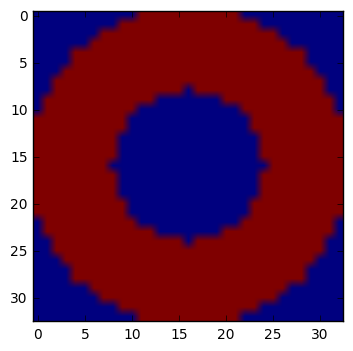

In [27]:
def generate_annular_selector(r_o, r_i):
    size = int(ceil(2 * r_o + 1))
    center = (r_o, r_o)
    selector = zeros((size, size))  # bounding box
    for y in range(size):
        for x in range(size):
            distance = distance_between_points((x, y), center)
            if distance > r_i and distance < r_o + 1:
                selector[y][x] = 1
    return selector

generated_selector = generate_annular_selector(16, 8)

pyplot.imshow(generated_selector)

In [ ]:
def check_collisions(grid, candidate, collider):
    collider_t = [translate_point(point, candidate)
                  for point in grid_to_list(collider)]
    for point in collider_t:
        if grid[point]:
            return True
    return False

In [41]:
while active_points:
    active_point = sample(active_points, 1)[0]
    print(active_point)
    annulus = generate_annular_selector(2 * r, r)
    collider = generate_annular_selector(r, 0)
    candidates = generate_candidates(active_point, annulus, n_candidates)
    succeeded = False
    for candidate in candidates:
        if not check_collisions(grid, candidate, collider):  # check if point can fit
            active_points.add(candidate)  # add point to active_points
            grid[int(candidate)] = len(active_points) - 1  # add index to grid
            succeeded = True
    if not succeeded:
        active_points.remove(active_point)

(18, 39)
(3, 0) (18, 39)
(2, 8) (18, 39)
(9, 8) (18, 39)
(2, 1) (18, 39)
(8, 9) (18, 39)
(9, 4) (18, 39)
(3, 7) (18, 39)
(7, 11) (18, 39)
(10, 3) (18, 39)
(1, 2) (18, 39)
(2, 9) (18, 39)
(11, 5) (18, 39)
(10, 7) (18, 39)
(6, 10) (18, 39)
(12, 6) (18, 39)
(8, 10) (18, 39)
(10, 9) (18, 39)
(12, 8) (18, 39)
(3, 2) (18, 39)
(5, 11) (18, 39)
(12, 7) (18, 39)
(1, 4) (18, 39)
(2, 3) (18, 39)
(1, 9) (18, 39)
(6, 12) (18, 39)
(2, 11) (18, 39)
(9, 9) (18, 39)
(1, 8) (18, 39)
(11, 6) (18, 39)
(10, 2) (18, 39)


NameError: name 'check_collisions' is not defined

(96, 69)